# Problem 3: Iterative Solution of Ax=b, using SOR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Inputs

In [2]:
A=np.array([[-4, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[1, -4, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 1, -4, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 1, -4, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 1, -4, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, -4, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 1, -4, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 1, -4, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, -4, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 1, -4]])

b=np.array([-27,-15,-15,-15,-15,-15,-15,-15,-15,-15])

omega=np.array([0.8, 1.0, 1.1, 1.2, 1.5])

eps=1e-4

## A function that solves Ax=b iteratively, using SOR and returning the iteration number for each given $\omega$

In [3]:
def solveSOR(A, b, omega, eps):
    n = len(A)
    it_num = np.zeros(omega.shape[0])
    for k in range(omega.shape[0]):
        x = np.zeros(A.shape[0])
        norm = 1e10
        while norm > eps:
            it_num[k] = it_num[k] + 1
            x_prev = x.copy()
            for i in range(n):
                sum1 = 0
                sum2 = 0
                for j in range(i):
                    sum1 = sum1 + A[i,j] * x[j]
                for j in range(i + 1, n):
                    sum2 = sum2 + A[i,j] * x_prev[j]
                x[i]= (1 - omega[k]) * x_prev[i] + omega[k] * (b[i] - sum1 - sum2) / A[i,i]
            norm = max(abs(x - x_prev))
    return x, it_num

## Result

In [4]:
sol, steps = solveSOR(A, b, omega, eps)
print(sol)

[ 8.70576935  7.8230216   7.58635328  7.52244041  7.50343219  7.49130032
  7.46178059  7.35583193  6.96155436  5.49038737]


### Plot of results for each $\omega$

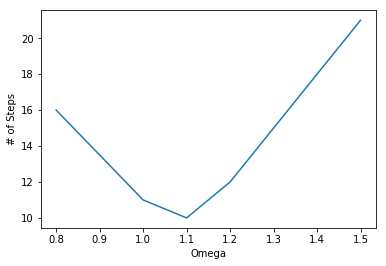

In [5]:
plt.plot(omega, steps)
plt.xlabel('Omega')
plt.ylabel('# of Steps')
plt.show()